In [ ]:
import pandas as pd
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import matplotlib
from pylab import rcParams

In [ ]:
# Read the data file
df = pd.read_excel("/content/Superstore.xls")

In [ ]:
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2013-138688,2013-06-13,2013-06-17,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


### Analysing Furniture category
There are three categories of sales: Furniture, Office Supply and Technology.
We will work on time series analysis and forecasting for furniture sales.

In [ ]:
df_furniture = df.loc[df['Category'] == 'Furniture']
df_furniture

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2013-152156,2013-11-09,2013-11-12,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
3,4,US-2012-108966,2012-10-11,2012-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
5,6,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
10,11,CA-2011-115812,2011-06-09,2011-06-14,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,...,90032,West,FUR-TA-10001539,Furniture,Tables,Chromcraft Rectangular Conference Tables,1706.1840,9,0.20,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9962,9963,CA-2012-168088,2012-03-19,2012-03-22,First Class,CM-12655,Corinna Mitchell,Home Office,United States,Houston,...,77041,Central,FUR-BO-10004218,Furniture,Bookcases,Bush Heritage Pine Collection 5-Shelf Bookcase...,383.4656,4,0.32,-67.6704
9964,9965,CA-2013-146374,2013-12-06,2013-12-11,Second Class,HE-14800,Harold Engle,Corporate,United States,Newark,...,19711,East,FUR-FU-10002671,Furniture,Furnishings,Electrix 20W Halogen Replacement Bulb for Zoom...,13.4000,1,0.00,6.4320
9980,9981,US-2012-151435,2012-09-06,2012-09-09,Second Class,SW-20455,Shaun Weien,Consumer,United States,Lafayette,...,70506,South,FUR-TA-10001039,Furniture,Tables,KI Adjustable-Height Table,85.9800,1,0.00,22.3548
9989,9990,CA-2011-110422,2011-01-22,2011-01-24,Second Class,TB-21400,Tom Boeckenhauer,Consumer,United States,Miami,...,33180,South,FUR-FU-10001889,Furniture,Furnishings,Ultra Door Pull Handle,25.2480,3,0.20,4.1028


In [ ]:
# Lets look at the range of sales of data
print("Min Sale date: ",df_furniture['Order Date'].min())
print("Max Sale date: ", df_furniture['Order Date'].max())

Min Sale date:  2011-01-07 00:00:00
Max Sale date:  2014-12-31 00:00:00


In [ ]:
# Check for null values, we focus on order date and sales column and make sure there are no missing values.
df_furniture.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [ ]:
columns = ['Row ID', 'Order ID', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Quantity', 'Discount', 'Profit']
df_furniture.drop(columns, axis=1, inplace=True)

In [ ]:
df_furniture.head()

,Order Date,Sales
0,2013-11-09,261.9600
1,2013-11-09,731.9400
3,2012-10-11,957.5775
5,2011-06-09,48.8600
10,2011-06-09,1706.1840


In [ ]:
df_furniture = df_furniture.groupby('Order Date')['Sales'].sum().reset_index()
df_furniture = df_furniture.set_index('Order Date')
df_furniture.index

DatetimeIndex(['2011-01-07', '2011-01-08', '2011-01-11', '2011-01-12',
               '2011-01-14', '2011-01-15', '2011-01-17', '2011-01-20',
               '2011-01-21', '2011-01-22',
               ...
               '2014-12-19', '2014-12-20', '2014-12-22', '2014-12-23',
               '2014-12-24', '2014-12-25', '2014-12-26', '2014-12-29',
               '2014-12-30', '2014-12-31'],
              dtype='datetime64[ns]', name='Order Date', length=890, freq=None)

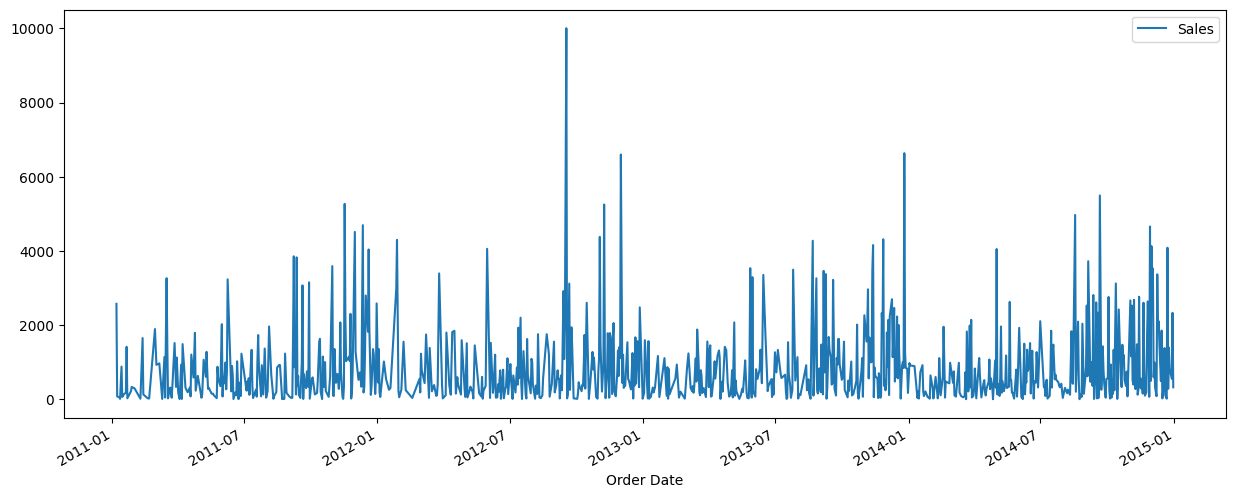

In [ ]:
# Plot the sales data
df_furniture.plot(figsize=(15, 6))
plt.show()

In [ ]:
# Since it's really hard to read the sales data in current format, we will resample the data on Monthly basis

df_furniture = df_furniture['Sales'].resample('MS').mean()
df_furniture

Order Date
2011-01-01     495.988250
2011-02-01     355.054000
2011-03-01     857.291529
2011-04-01     567.488357
2011-05-01     432.049188
2011-06-01     695.059242
2011-07-01     601.169500
2011-08-01     457.521656
2011-09-01     992.353367
2011-10-01     769.015437
2011-11-01     980.221486
2011-12-01    1532.298325
2012-01-01     978.328467
2012-02-01     474.160857
2012-03-01     769.689437
2012-04-01     805.822962
2012-05-01     624.996700
2012-06-01     428.565500
2012-07-01     719.706316
2012-08-01     602.412012
2012-09-01    1382.790684
2012-10-01     632.980184
2012-11-01    1286.701354
2012-12-01    1049.355418
2013-01-01     508.182867
2013-02-01     356.868273
2013-03-01     623.654800
2013-04-01     705.557368
2013-05-01     683.235818
2013-06-01     751.678437
2013-07-01     776.430059
2013-08-01     756.627794
2013-09-01    1162.563517
2013-10-01     533.198526
2013-11-01    1346.375352
2013-12-01    1372.914259
2014-01-01     397.602133
2014-02-01     528.179800
2

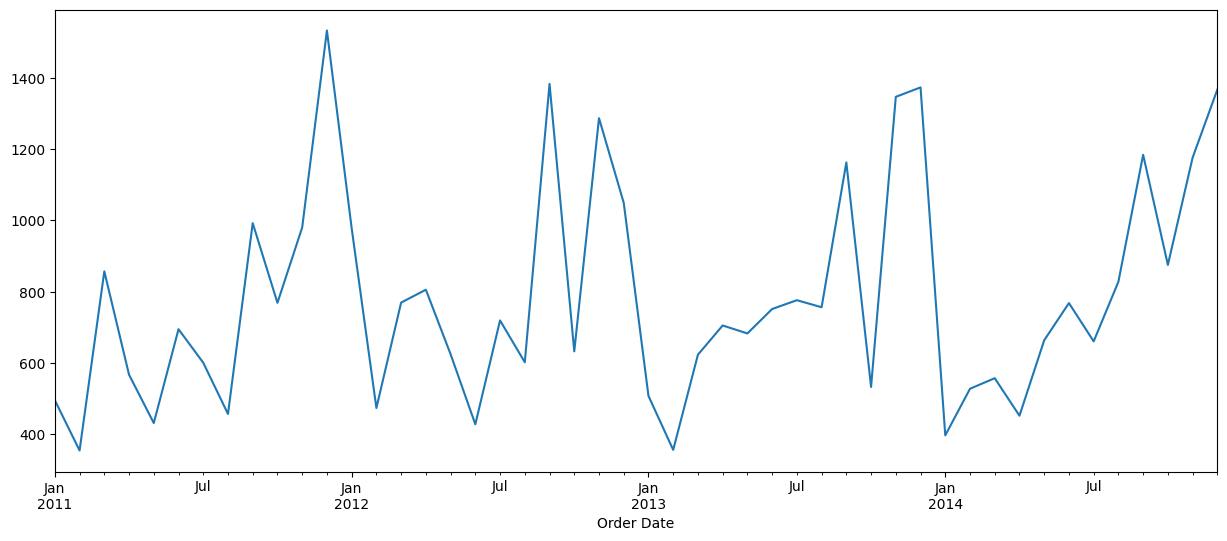

In [ ]:
# Plot the sales data
df_furniture.plot(figsize=(15, 6))
plt.show()

### Time Decomposition

Distinctive patterns emerge when visualizing the data. The time series exhibits a seasonal pattern, with sales consistently starting low at the beginning of each year and peaking at the year's end. Within each individual year, there is a consistent upward trend, interspersed with a few months of lower sales in the middle of the year.

Time Series decomposition allows us to decompose our time series into three distinct components: trend, seasonality, and noise.

In essence, time decomposition is like taking apart a puzzle to see its individual pieces. It helps us grasp the different elements that contribute to the overall pattern of the time series, leading to a more informed understanding and better decision-making.

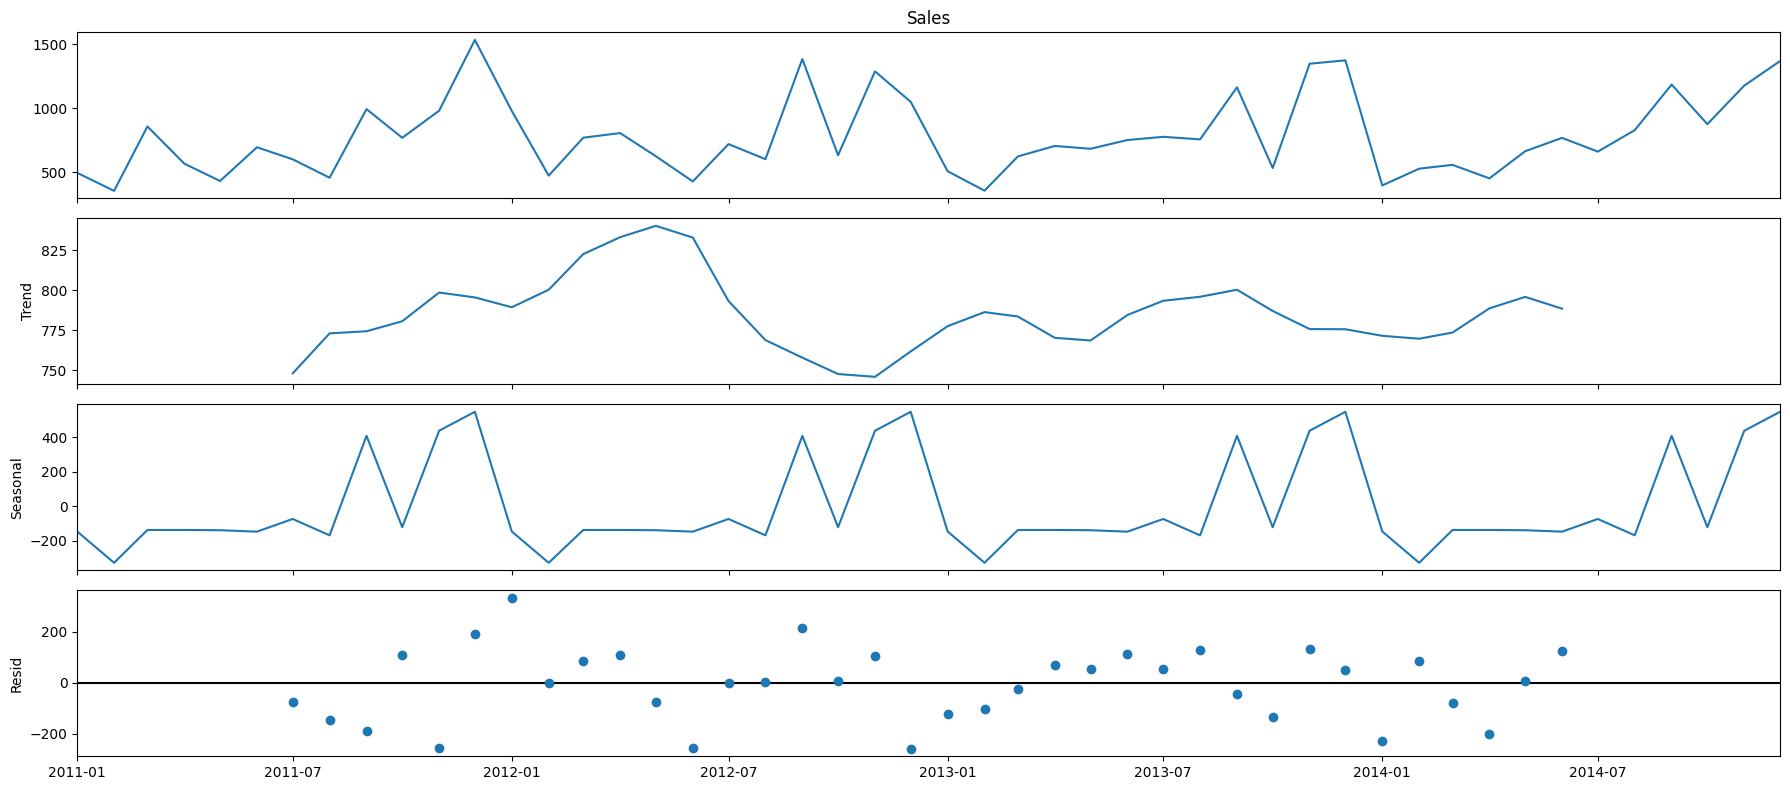

In [ ]:
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(df_furniture, model='additive')
fig = decomposition.plot()
plt.show()

### Check for Stationarity

This is a very important concept in Time Series Analysis. In order to apply a time series model, it is important for the Time series to be stationary; in other words all its statistical properties (mean,variance) remain constant over time.

In [ ]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):

    #Determing rolling statistics
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    #Plot rolling statistics:
    plt.plot(timeseries, color='blue',label='Original')
    plt.plot(rolmean, color='red', label='Rolling Mean')
    plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

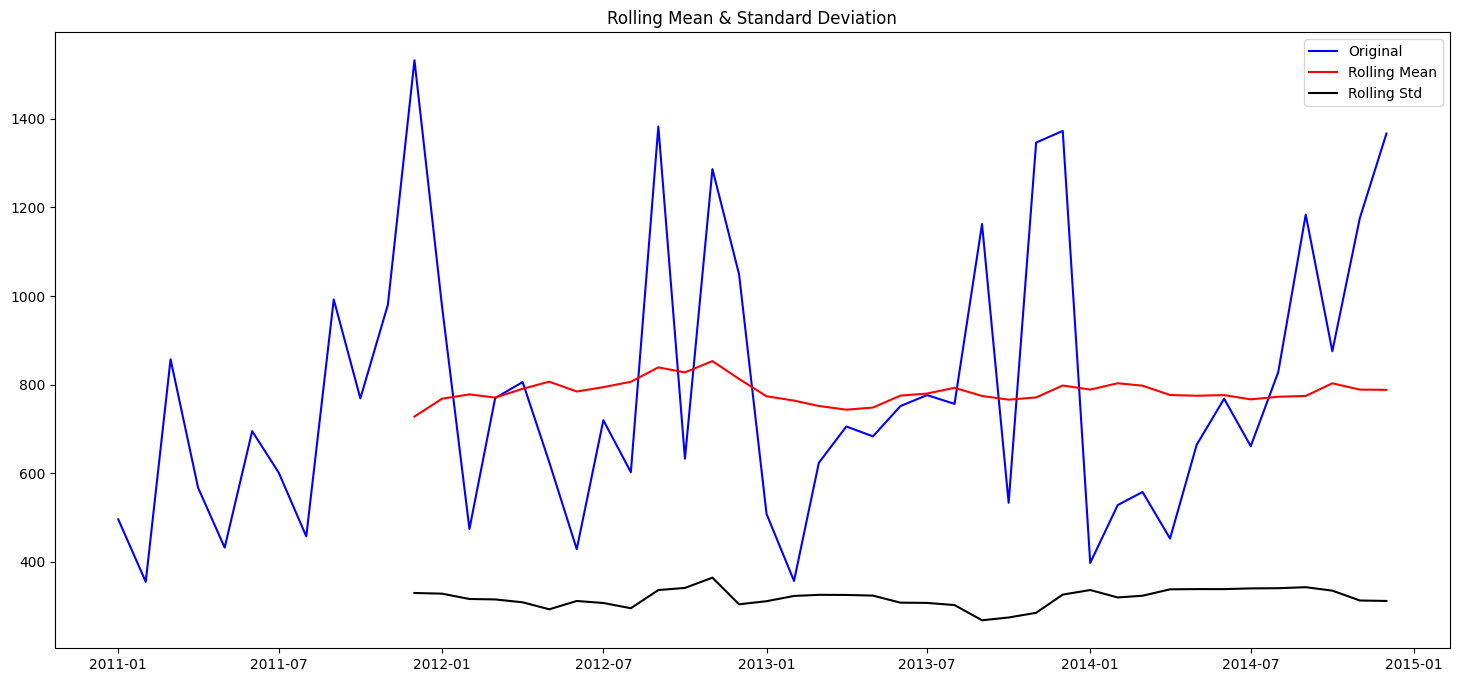

Results of Dickey-Fuller Test:
Test Statistic                -5.648685e+00
p-value                        9.975923e-07
#Lags Used                     1.000000e+01
Number of Observations Used    3.700000e+01
Critical Value (1%)           -3.620918e+00
Critical Value (5%)           -2.943539e+00
Critical Value (10%)          -2.610400e+00
dtype: float64


In [ ]:
test_stationarity(df_furniture)

### Make data Stationary

1. The first step is to reduce the trend using transformation.
2. Reduce Seasonality using transformation.

There are two common methods to remove trend and seasonality, they are:

1. Differencing: by taking difference using time lag

2. Decomposition: model both trend and seasonality, then remove them

Differencing:
Here we first take the difference of the value at a particular time with that of the previous time.

In [ ]:
## Seasonality (along with Trend)
ts_lag_diff = ts_lag - ts_lag.shift()
plt.plot(ts_lag_diff)

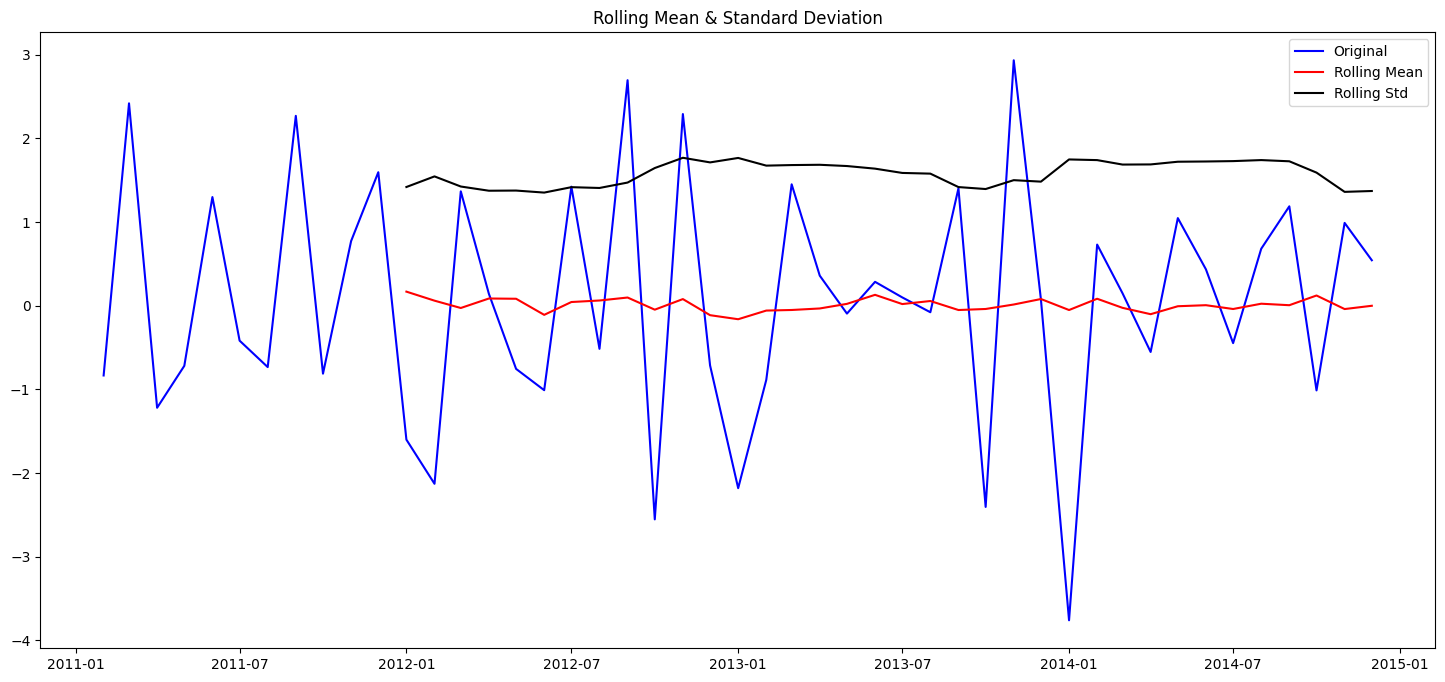

Results of Dickey-Fuller Test:
Test Statistic                -6.611092e+00
p-value                        6.374313e-09
#Lags Used                     1.000000e+01
Number of Observations Used    3.600000e+01
Critical Value (1%)           -3.626652e+00
Critical Value (5%)           -2.945951e+00
Critical Value (10%)          -2.611671e+00
dtype: float64


In [ ]:
ts_lag_diff.dropna(inplace=True)
test_stationarity(ts_lag_diff)

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(ts_lag)

trend = decomposition.trend
seaonality = decomposition.seasonal
residual = decomposition.resid

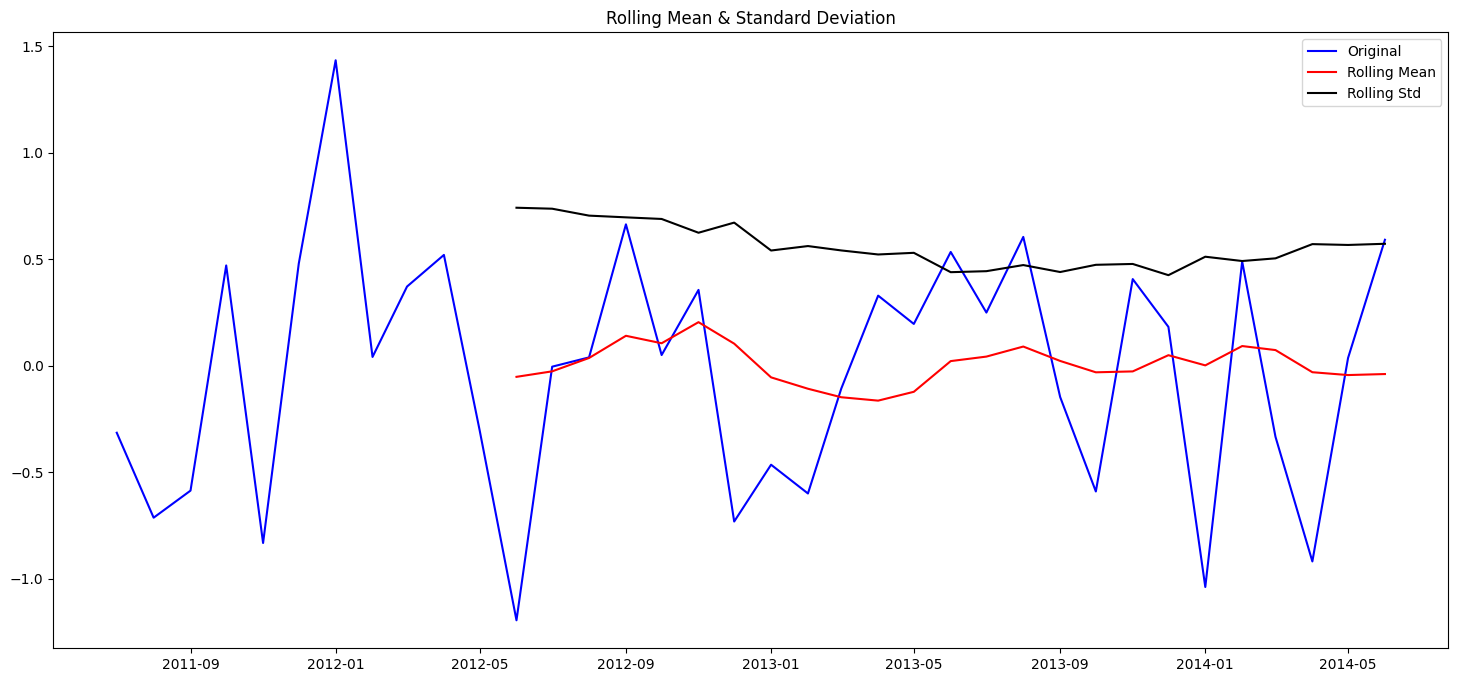

Results of Dickey-Fuller Test:
Test Statistic                 -5.401391
p-value                         0.000003
#Lags Used                      4.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


In [ ]:
ts_lag_decompose = residual
ts_lag_decompose.dropna(inplace=True)
test_stationarity(ts_lag_decompose)

## Time series forecasting with ARIMA

ARIMA models are denoted with the notation ARIMA(p, d, q). These three parameters account for seasonality, trend, and noise in data.

In [ ]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


#### Above output shows that ARIMA(0, 0, 1)x(0, 1, 1, 12)12 yields the lowest AIC value:23.42236049407621



## Fitting the ARIMA model

In [ ]:
for param in pdq:
    for param_seasonal in seasonal_pdq:

      try:
          mod = sm.tsa.statespace.SARIMAX(df_furniture,
                                          order=param,
                                          seasonal_order=param_seasonal,
                                          enforce_stationarity=False,
                                          enforce_invertibility=False)
          results = mod.fit()

          print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
      except:
          continue

ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:768.9298200948517
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:1757.4755038157937


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:476.07009292488334
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:301.21748944198913
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:495.4605330484474


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:1086.937248419022
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:318.4883135013573
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:303.57424214153286
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:721.7902291440636


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:2735.244561853935
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:465.1981274572689
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:290.7728465720517


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:497.7653166095653


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:2571.466368336023
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:320.4270735846922
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:292.58090232014945
ARIMA(0, 1, 0)x(0, 0, 0, 12)12 - AIC:679.1552417641366


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:1313.6925726374047
ARIMA(0, 1, 0)x(0, 1, 0, 12)12 - AIC:486.6038863927195
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:305.7026417208626
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:497.3341912177368


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:1271.3207677304151
ARIMA(0, 1, 0)x(1, 1, 0, 12)12 - AIC:321.6667818863875
ARIMA(0, 1, 0)x(1, 1, 1, 12)12 - AIC:307.26197268220915
ARIMA(0, 1, 1)x(0, 0, 0, 12)12 - AIC:650.7455741994077


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(0, 0, 1, 12)12 - AIC:2575.816435493027
ARIMA(0, 1, 1)x(0, 1, 0, 12)12 - AIC:457.02372267149985
ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.11219640982375
ARIMA(0, 1, 1)x(1, 0, 0, 12)12 - AIC:484.62712958724495


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(0, 1, 1)x(1, 0, 1, 12)12 - AIC:2553.8339702668204
ARIMA(0, 1, 1)x(1, 1, 0, 12)12 - AIC:306.7595390029883
ARIMA(0, 1, 1)x(1, 1, 1, 12)12 - AIC:281.1028745734534
ARIMA(1, 0, 0)x(0, 0, 0, 12)12 - AIC:693.576609492117
ARIMA(1, 0, 0)x(0, 0, 1, 12)12 - AIC:1487.61047339058


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 0)x(0, 1, 0, 12)12 - AIC:478.0054442595991
ARIMA(1, 0, 0)x(0, 1, 1, 12)12 - AIC:303.1858986011618
ARIMA(1, 0, 0)x(1, 0, 0, 12)12 - AIC:479.54898268446846
ARIMA(1, 0, 0)x(1, 0, 1, 12)12 - AIC:1360.349489317831
ARIMA(1, 0, 0)x(1, 1, 0, 12)12 - AIC:303.96460566982023
ARIMA(1, 0, 0)x(1, 1, 1, 12)12 - AIC:305.04387336698585
ARIMA(1, 0, 1)x(0, 0, 0, 12)12 - AIC:666.7044660723063
ARIMA(1, 0, 1)x(0, 0, 1, 12)12 - AIC:469.98521851060957


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(0, 1, 0, 12)12 - AIC:466.97387822897065
ARIMA(1, 0, 1)x(0, 1, 1, 12)12 - AIC:291.166549317483
ARIMA(1, 0, 1)x(1, 0, 0, 12)12 - AIC:480.1046095791347


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 0, 1)x(1, 0, 1, 12)12 - AIC:2590.3679561646927
ARIMA(1, 0, 1)x(1, 1, 0, 12)12 - AIC:303.3350952599739
ARIMA(1, 0, 1)x(1, 1, 1, 12)12 - AIC:291.225667805005
ARIMA(1, 1, 0)x(0, 0, 0, 12)12 - AIC:672.658348330064


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 0)x(0, 0, 1, 12)12 - AIC:1434.329661941207
ARIMA(1, 1, 0)x(0, 1, 0, 12)12 - AIC:479.20053994185685
ARIMA(1, 1, 0)x(0, 1, 1, 12)12 - AIC:300.54758607165536
ARIMA(1, 1, 0)x(1, 0, 0, 12)12 - AIC:474.9759095696308
ARIMA(1, 1, 0)x(1, 0, 1, 12)12 - AIC:1418.4978320231194
ARIMA(1, 1, 0)x(1, 1, 0, 12)12 - AIC:301.60674558881215
ARIMA(1, 1, 0)x(1, 1, 1, 12)12 - AIC:302.37720287772805
ARIMA(1, 1, 1)x(0, 0, 0, 12)12 - AIC:650.2465934337595


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


ARIMA(1, 1, 1)x(0, 0, 1, 12)12 - AIC:2351.3279568483413
ARIMA(1, 1, 1)x(0, 1, 0, 12)12 - AIC:458.87784652822126
ARIMA(1, 1, 1)x(0, 1, 1, 12)12 - AIC:280.5910474054763
ARIMA(1, 1, 1)x(1, 0, 0, 12)12 - AIC:468.2051954896661
ARIMA(1, 1, 1)x(1, 0, 1, 12)12 - AIC:2566.84844980585
ARIMA(1, 1, 1)x(1, 1, 0, 12)12 - AIC:296.0198016154854
ARIMA(1, 1, 1)x(1, 1, 1, 12)12 - AIC:282.58106683572487


In [ ]:
#ARIMA(0, 1, 1)x(0, 1, 1, 12)12 - AIC:279.11219640982375

mod = sm.tsa.statespace.SARIMAX(df_furniture,
                                order=(0, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.0000      0.437     -2.286      0.022      -1.857      -0.143
ma.S.L12      -0.2944      0.153     -1.930      0.054      -0.593       0.005
sigma2      2.445e+04   1.79e-05   1.37e+09      0.000    2.44e+04    2.44e+04


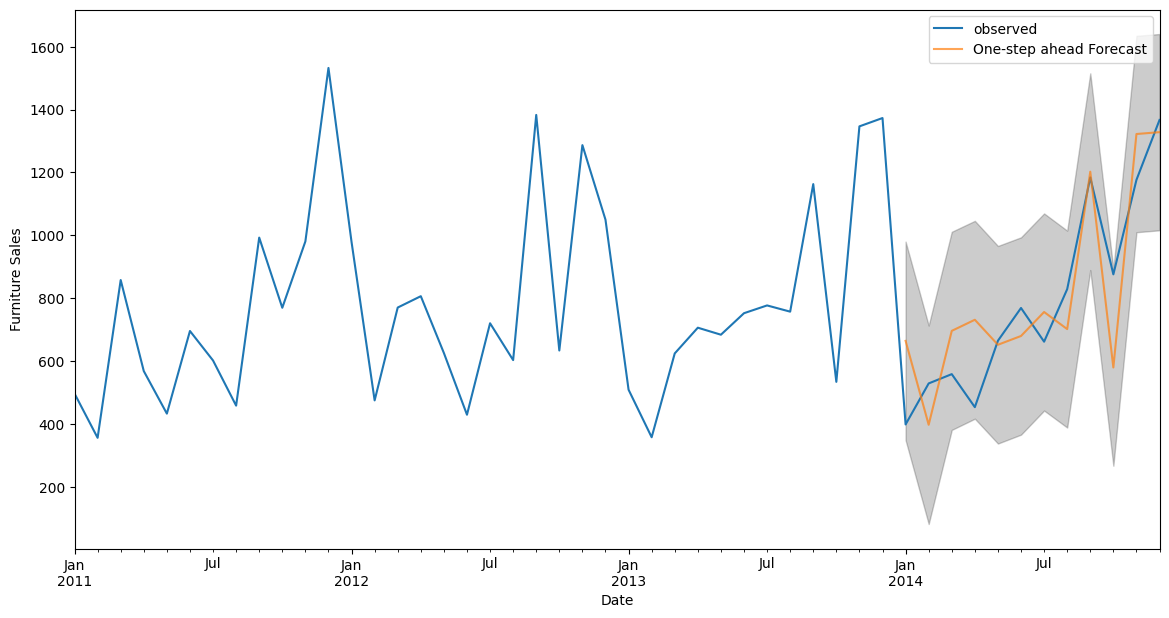

In [ ]:
pred = results.get_prediction(start=pd.to_datetime('2014-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = df_furniture['2011':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Furniture Sales')
plt.legend()
plt.show()